In [376]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [377]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [208]:
%pip install numpy --upgrade


  Using cached numpy-1.23.5-cp38-cp38-macosx_10_9_x86_64.whl (18.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%EmbeddingTransformer` not found.


In [210]:
%pip install zeugma

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 986.3/986.3 kB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 14.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 1.4 MB/s eta 0:00:00
  Using cached numpy-1.22.4-cp38-cp38-macosx_10_15_x86_64.whl (17.6 MB)


  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8803 sha256=cb177517cdd364afcb2bab83b7f8a5317917e9be1f573306101d3916596ee233
  Stored in directory: /Users/eri/Library/Caches/pip/wheels/ab/a5/63/d81cd00eb4c6771813927dd075557975934ed86fcf057068c6
Successfully built zeugma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


In [212]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


## Load Data

In [5]:
def df_dict_from_pkls():
    
    df_dict = {}
    
    for root, dirs, files in os.walk("./data/pkl", topdown=False):
        for name in files:
            file_path = os.path.join(root, name)
            print(file_path)
            df = pd.read_pickle(file_path)
            df_dict[name[:-4]] = df
    
    return df_dict

df_dict = df_dict_from_pkls()

df_dict.keys()

./data/pkl/B19_1.pkl
./data/pkl/B20_0.pkl
./data/pkl/B18_1.pkl
./data/pkl/B4_0.pkl
./data/pkl/B10_0.pkl
./data/pkl/B12_0.pkl
./data/pkl/B6_0.pkl
./data/pkl/B2_0.pkl
./data/pkl/B16_0.pkl
./data/pkl/B14_1.pkl
./data/pkl/B13_0.pkl
./data/pkl/B5_0.pkl
./data/pkl/B1_0.pkl
./data/pkl/B15_1.pkl
./data/pkl/B17_0.pkl


dict_keys(['B19_1', 'B20_0', 'B18_1', 'B4_0', 'B10_0', 'B12_0', 'B6_0', 'B2_0', 'B16_0', 'B14_1', 'B13_0', 'B5_0', 'B1_0', 'B15_1', 'B17_0'])

In [6]:
pd.read_pickle('./data/pkl/B19_1.pkl')

,Id,Img Id,Da,Dp,FWidth,FLength,ELength,EWidth,Volume,Area,...,Filter5,Filter6,L/W Ratio,W/L Aspect Ratio,CHull Surface Area,Ellipticity,Fiber Length,Fiber Width,Flow,Flow Class
0,497,93,75.271,111.108,77.917,103.662,99.352,68.668,223297.466,4449.863,...,Reject,Reject,1.330,0.752,21831.799,1.447,141.829,31.375,18.82,1
1,1148,157,81.792,109.617,77.498,115.331,101.638,74.907,286499.936,5254.206,...,Reject,Reject,1.488,0.672,25411.466,1.357,130.807,40.168,18.82,1
2,2574,372,77.578,85.572,77.028,80.767,78.027,77.238,244463.906,4726.801,...,Reject,Reject,1.049,0.954,19448.796,1.010,0.000,0.000,18.82,1
3,1981,258,77.654,81.371,76.001,81.525,79.228,76.196,245180.011,4736.027,...,Reject,Reject,1.073,0.932,19295.068,1.040,0.000,0.000,18.82,1
4,491,93,70.913,94.345,73.622,88.799,80.050,73.769,186717.428,3949.548,...,Reject,Reject,1.206,0.829,18711.459,1.085,111.162,35.530,18.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,1249,171,4.241,5.351,3.283,6.501,6.622,2.730,39.927,14.123,...,Reject,Reject,1.980,0.505,66.776,2.426,0.000,0.000,18.82,1
2838,1552,200,4.541,5.247,3.183,7.210,6.510,3.026,49.018,16.193,...,Reject,Reject,2.265,0.441,65.261,2.152,0.000,0.000,18.82,1
2839,849,121,3.125,3.971,3.135,4.567,3.859,2.857,15.983,7.671,...,Reject,Reject,1.457,0.686,36.709,1.350,0.000,0.000,18.82,1
2840,1662,214,3.986,4.642,3.107,5.907,5.437,2.847,33.160,12.479,...,Reject,Reject,1.901,0.526,51.777,1.910,0.000,0.000,18.82,1


In [6]:
df_dict['B19_1'].head()

,Id,Img Id,Da,Dp,FWidth,FLength,ELength,EWidth,Volume,Area,...,Filter5,Filter6,L/W Ratio,W/L Aspect Ratio,CHull Surface Area,Ellipticity,Fiber Length,Fiber Width,Flow,Flow Class
0,497,93,75.271,111.108,77.917,103.662,99.352,68.668,223297.466,4449.863,...,Reject,Reject,1.330,0.752,21831.799,1.447,141.829,31.375,18.82,1
1,1148,157,81.792,109.617,77.498,115.331,101.638,74.907,286499.936,5254.206,...,Reject,Reject,1.488,0.672,25411.466,1.357,130.807,40.168,18.82,1
2,2574,372,77.578,85.572,77.028,80.767,78.027,77.238,244463.906,4726.801,...,Reject,Reject,1.049,0.954,19448.796,1.010,0.000,0.000,18.82,1
3,1981,258,77.654,81.371,76.001,81.525,79.228,76.196,245180.011,4736.027,...,Reject,Reject,1.073,0.932,19295.068,1.040,0.000,0.000,18.82,1
4,491,93,70.913,94.345,73.622,88.799,80.050,73.769,186717.428,3949.548,...,Reject,Reject,1.206,0.829,18711.459,1.085,111.162,35.530,18.82,1


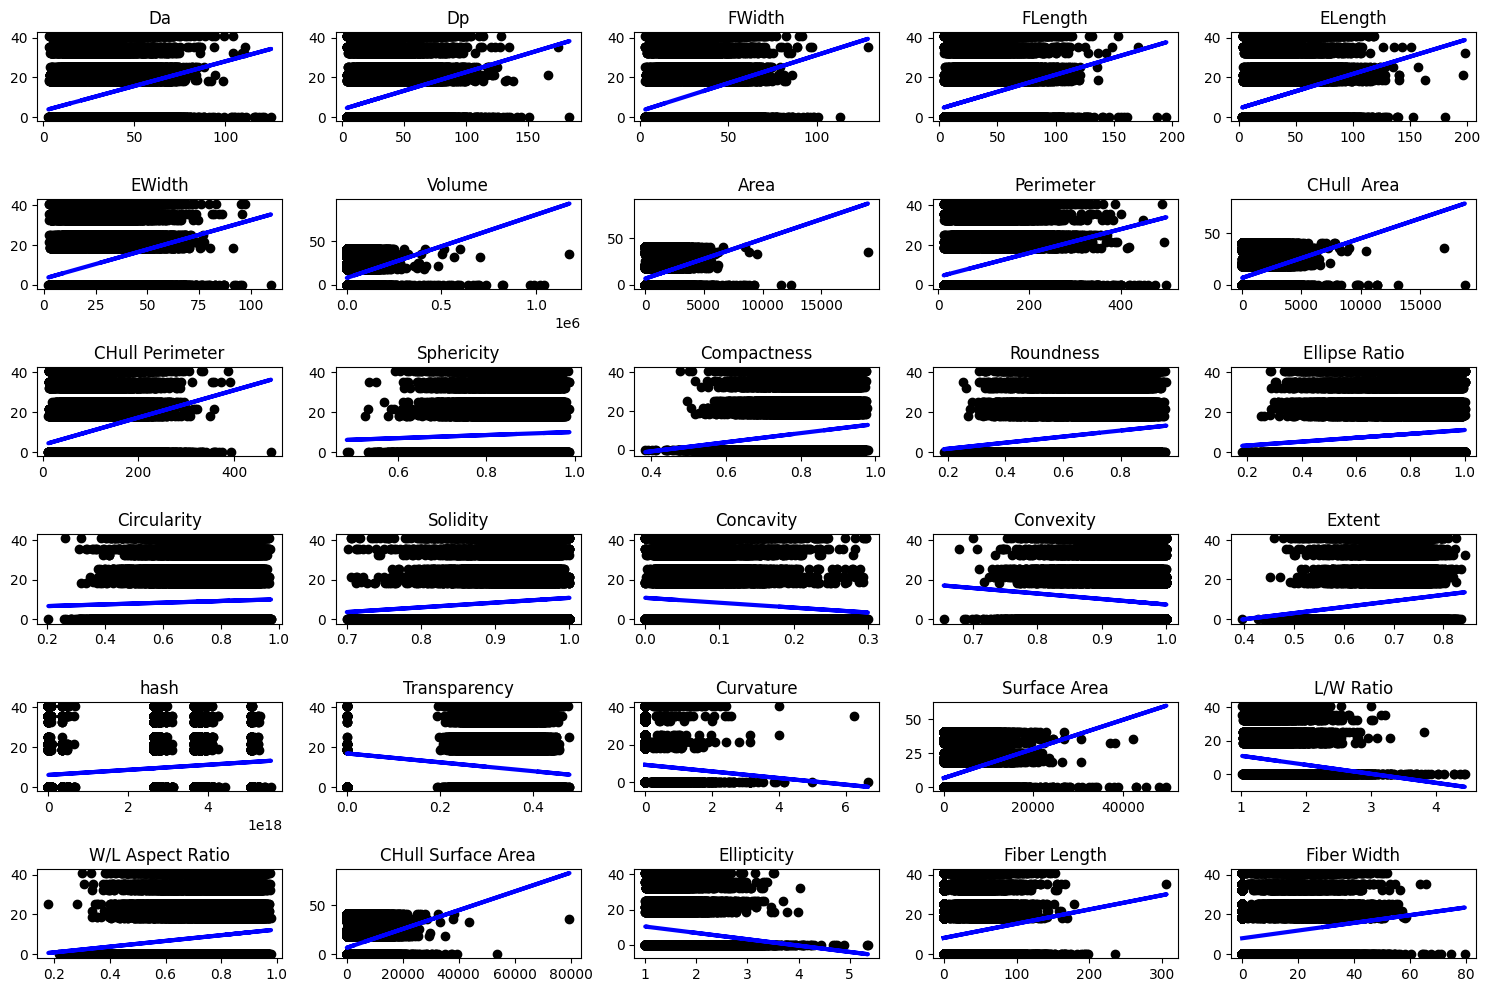

In [7]:
df = pd.concat(df_dict.values(), axis = 0)

df = df._get_numeric_data()

figure, axis = plt.subplots(6, 5, figsize=(15, 10))

for i,col in enumerate(df.columns[2:-2]):
    
    df_col = df[[col,'Flow']]
    
    train, test = train_test_split(df_col, test_size=0.2)
    
    x_train = train[col].values.reshape(-1,1)
    y_train = train['Flow'].values
    
    x_test = test[col].values.reshape(-1,1)
    y_test = test['Flow'].values
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    #y_pred = regr.predict(x_test)
    
    ax = axis.flatten()[i]
    ax.scatter(x_test, y_test, color = 'black')
    ax.plot(x_test, regr.predict(x_test), color='blue', linewidth=3)
    ax.set_title(label = col)
    
figure.tight_layout(pad=1)
plt.show()

In [14]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [9]:
df = pd.concat(df_dict.values(), axis = 0)

df = df._get_numeric_data().reset_index(drop = True)
df_features = df.drop(['Id', 'Img Id', 'hash', 'Flow', 'Flow Class'],axis = 1)
df_features = variance_threshold_selector(df_features, 0.8)

print(df_features.columns)

df = pd.concat([df_features, df['Flow'], df['Flow Class']], axis = 1)

train, test = train_test_split(df, test_size=0.2)

train_x = train.iloc[:,:-2]
train_y = train.iloc[:,-2]
train_class = train.iloc[:,-1]

test_x = test.iloc[:,:-2]
test_y = test.iloc[:,-2]
test_class = test.iloc[:,-1]

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

pred_y = regr.predict(test_x)

print(regr.score(test_x, test_y))
print('mean_squared_error : ', mean_squared_error(test_y, pred_y))
print('mean_absolute_error : ', mean_absolute_error(test_y, pred_y))

Index(['Da', 'Dp', 'FWidth', 'FLength', 'ELength', 'EWidth', 'Volume', 'Area',
       'Perimeter', 'CHull  Area', 'CHull Perimeter', 'Surface Area',
       'CHull Surface Area', 'Fiber Length', 'Fiber Width'],
      dtype='object')
0.08561447750026585
mean_squared_error :  185.09447370011264
mean_absolute_error :  11.127248522866921


In [17]:
print('no-flow: mean_squared_error : ', mean_squared_error(test_y[test_class == 0], pred_y[test_class == 0]))
print('no-flow: mean_absolute_error : ', mean_absolute_error(test_y[test_class == 0], pred_y[test_class == 0]))

no-flow: mean_squared_error :  197.2277222860562
no-flow: mean_absolute_error :  11.38535519305567


In [18]:
print('flow: mean_squared_error : ', mean_squared_error(test_y[test_class == 1], pred_y[test_class == 1]))
print('flow: mean_absolute_error : ', mean_absolute_error(test_y[test_class == 1], pred_y[test_class == 1]))

flow: mean_squared_error :  125.14044385734778
flow: mean_absolute_error :  9.910844481507587


In [19]:
X2 = sm.add_constant(train_x)
est = sm.OLS(train_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     763.0
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:20:00   Log-Likelihood:            -4.6504e+05
No. Observations:              115461   AIC:                         9.301e+05
Df Residuals:                  115445   BIC:                         9.303e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0379      0

In [36]:
from sklearn.neural_network import MLPRegressor

# Create model object
clf = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')


# Fit data onto the model
clf.fit(train_x,train_y)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [40]:
y_pred = clf.predict(test_x)

In [41]:
clf.score(test_x, test_y)

0.09526856408645912

In [42]:
df_temp = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
1008,18.82,15.175827
59656,0.00,7.160774
46472,0.00,3.950566
43292,0.00,5.622380
87875,0.00,6.844803


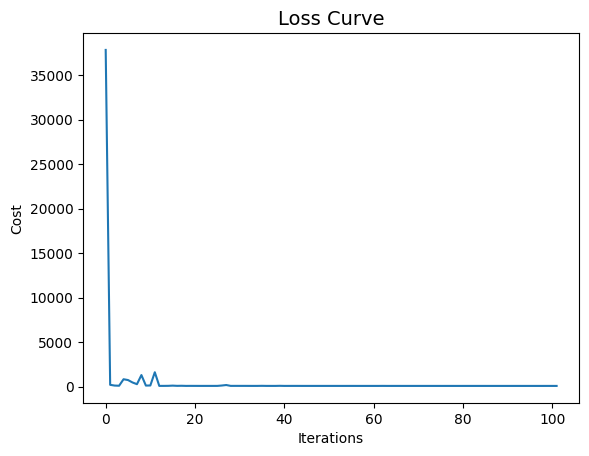

In [44]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [43]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(clf, param_grid, n_jobs= -1, cv=5)
grid.fit(train_x, train_y)

print(grid.best_params_) 

In [ ]:
grid_predictions = grid.predict(test_x) 

In [ ]:
# Classifier

In [7]:
def df_dict_from_pkls():
    
    df_dict = {}
    
    for root, dirs, files in os.walk("./data/pkl", topdown=False):
        for name in files:
            file_path = os.path.join(root, name)
            print(file_path)
            df = pd.read_pickle(file_path)
            df_dict[name[:-4]] = df
    
    return df_dict

df_dict = df_dict_from_pkls()

pd.read_pickle('./data/pkl/B19_1.pkl')


./data/pkl/B19_1.pkl
./data/pkl/B20_0.pkl
./data/pkl/B18_1.pkl
./data/pkl/B4_0.pkl
./data/pkl/B10_0.pkl
./data/pkl/B12_0.pkl
./data/pkl/B6_0.pkl
./data/pkl/B2_0.pkl
./data/pkl/B16_0.pkl
./data/pkl/B14_1.pkl
./data/pkl/B13_0.pkl
./data/pkl/B5_0.pkl
./data/pkl/B1_0.pkl
./data/pkl/B15_1.pkl
./data/pkl/B17_0.pkl


,Id,Img Id,Da,Dp,FWidth,FLength,ELength,EWidth,Volume,Area,...,Filter5,Filter6,L/W Ratio,W/L Aspect Ratio,CHull Surface Area,Ellipticity,Fiber Length,Fiber Width,Flow,Flow Class
0,497,93,75.271,111.108,77.917,103.662,99.352,68.668,223297.466,4449.863,...,Reject,Reject,1.330,0.752,21831.799,1.447,141.829,31.375,18.82,1
1,1148,157,81.792,109.617,77.498,115.331,101.638,74.907,286499.936,5254.206,...,Reject,Reject,1.488,0.672,25411.466,1.357,130.807,40.168,18.82,1
2,2574,372,77.578,85.572,77.028,80.767,78.027,77.238,244463.906,4726.801,...,Reject,Reject,1.049,0.954,19448.796,1.010,0.000,0.000,18.82,1
3,1981,258,77.654,81.371,76.001,81.525,79.228,76.196,245180.011,4736.027,...,Reject,Reject,1.073,0.932,19295.068,1.040,0.000,0.000,18.82,1
4,491,93,70.913,94.345,73.622,88.799,80.050,73.769,186717.428,3949.548,...,Reject,Reject,1.206,0.829,18711.459,1.085,111.162,35.530,18.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,1249,171,4.241,5.351,3.283,6.501,6.622,2.730,39.927,14.123,...,Reject,Reject,1.980,0.505,66.776,2.426,0.000,0.000,18.82,1
2838,1552,200,4.541,5.247,3.183,7.210,6.510,3.026,49.018,16.193,...,Reject,Reject,2.265,0.441,65.261,2.152,0.000,0.000,18.82,1
2839,849,121,3.125,3.971,3.135,4.567,3.859,2.857,15.983,7.671,...,Reject,Reject,1.457,0.686,36.709,1.350,0.000,0.000,18.82,1
2840,1662,214,3.986,4.642,3.107,5.907,5.437,2.847,33.160,12.479,...,Reject,Reject,1.901,0.526,51.777,1.910,0.000,0.000,18.82,1


In [437]:
from sklearn.utils import resample
df = pd.concat(df_dict.values(), axis = 0)

df = df._get_numeric_data().reset_index(drop = True)
df_class0 = df[df['Flow Class']==0]
df_class1 = df[df['Flow Class']==1]

maj_class1 = resample(df_class0, 
                                 replace=True,     
                                 n_samples=1500,    
                                 random_state=123) 
maj_class2 = resample(df_class1, 
                                 replace=True,     
                                 n_samples=1500,    
                                 random_state=123) 
df=pd.concat([maj_class1,maj_class2])
df['Flow Class'].value_counts()


0    1500
1    1500
Name: Flow Class, dtype: int64

In [438]:

df_features = df.drop(['Id', 'Img Id', 'hash', 'Flow'],axis = 1)
df_features = variance_threshold_selector(df_features, 0.8)

print(df_features.columns)


df = pd.concat([df_features, df['Flow'], df['Flow Class']], axis = 1)

print(df)
train, test = train_test_split(df, test_size=0.2)

train_x = train.iloc[:,:-2]
train_y = train.iloc[:,-1]
train_class = train.iloc[:,-1]

test_x = test.iloc[:,:-2]
test_y = test.iloc[:,-1]
test_class = test.iloc[:,-1]
train_y.value_counts()
test_y.value_counts()

Index(['Da', 'Dp', 'FWidth', 'FLength', 'ELength', 'EWidth', 'Volume', 'Area',
       'Perimeter', 'CHull  Area', 'CHull Perimeter', 'Surface Area',
       'CHull Surface Area', 'Fiber Length', 'Fiber Width'],
      dtype='object')
            Da      Dp  FWidth  FLength  ELength  EWidth     Volume      Area  \
142029  11.022  11.321  10.819   11.755   11.213  10.753    701.126    95.416   
18567   10.937  12.774   8.228   15.681   15.346   7.857    684.944    93.942   
39458   19.795  21.923  19.073   22.490   20.915  18.804   4061.308   307.752   
20572    6.915   7.270   6.473    7.731    7.065   6.681    173.142    37.557   
72832    6.932   7.912   5.720   10.006    9.228   5.281    174.435    37.744   
...        ...     ...     ...      ...      ...     ...        ...       ...   
97322   19.617  21.355  17.733   24.196   21.922  17.654   3952.544   302.233   
96108   28.972  34.812  22.874   39.883   39.545  21.310  12732.515   659.225   
32160   12.214  13.557  12.040   13.866

1    333
0    267
Name: Flow Class, dtype: int64

In [439]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaler = sc.fit(train_x)
trainX_scaled = scaler.transform(train_x)
testX_scaled = scaler.transform(test_x)

In [440]:
target_column = ['Flow Class'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Da,3000.0,0.230490,0.146221,0.023555,0.108445,0.199414,0.332140,1.0
Dp,3000.0,0.197398,0.132945,0.022724,0.090566,0.164340,0.280317,1.0
FWidth,3000.0,0.250992,0.157331,0.029526,0.120047,0.218690,0.363753,1.0
FLength,3000.0,0.197587,0.132811,0.023934,0.091991,0.164748,0.279789,1.0
ELength,3000.0,0.165742,0.115133,0.016914,0.075565,0.137910,0.235480,1.0
EWidth,3000.0,0.255056,0.160243,0.022135,0.120504,0.221787,0.370373,1.0
Volume,3000.0,0.029252,0.050840,0.000013,0.001275,0.007930,0.036641,1.0
Area,3000.0,0.074499,0.086522,0.000555,0.011760,0.039767,0.110317,1.0
Perimeter,3000.0,0.197398,0.132944,0.022721,0.090568,0.164339,0.280315,1.0
CHull Area,3000.0,0.076011,0.090109,0.000685,0.012158,0.039841,0.111230,1.0


In [441]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,50,50),
                        max_iter = 300,activation = 'tanh',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, train_y)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 50), max_iter=300)

In [442]:
y_pred = mlp_clf.predict(testX_scaled)

In [443]:
from sklearn.metrics import accuracy_score

print('Accuracy: {:.2f}'.format(accuracy_score(test_y, y_pred)))

Accuracy: 0.64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


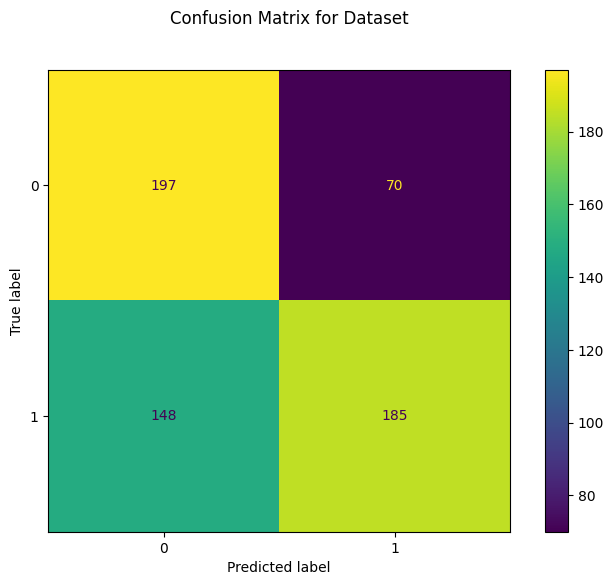

In [444]:
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(mlp_clf, testX_scaled, test_y, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Dataset")
plt.show()

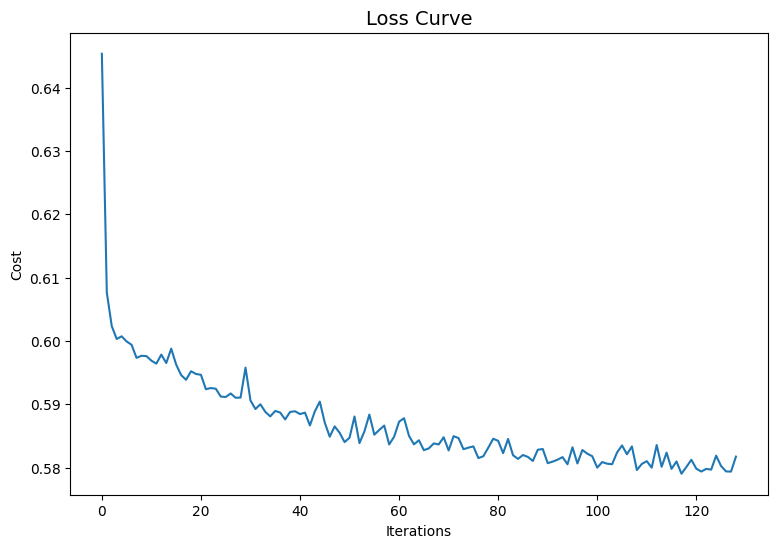

In [445]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [157]:
param_grid = {
    'hidden_layer_sizes': [(50,30,10),(30,20,10),(20,10,5)],
    'max_iter': [100,200,300],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [158]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, train_y)

print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 30, 10), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}


In [336]:
mlp_clf = MLPClassifier(activation='tanh', alpha=3, solver='lbfgs', hidden_layer_sizes=(100,75,50, 25), learning_rate='adaptive', random_state=1, tol=0.000001)

mlp_clf.fit(trainX_scaled, train_y)
y_pred = mlp_clf.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(test_y, y_pred)))

Accuracy: 0.67


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


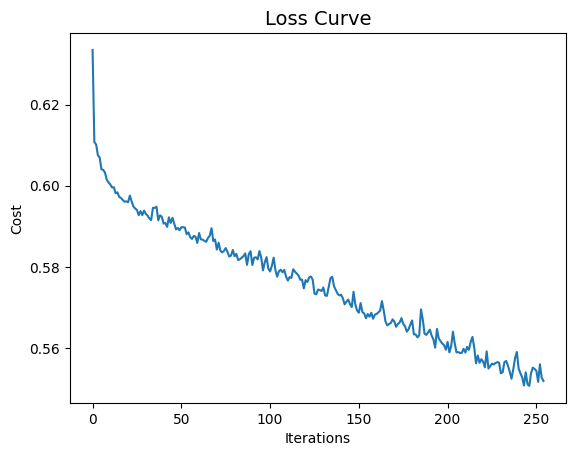

In [136]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [159]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(test_y, grid_predictions)))

Accuracy: 0.50


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


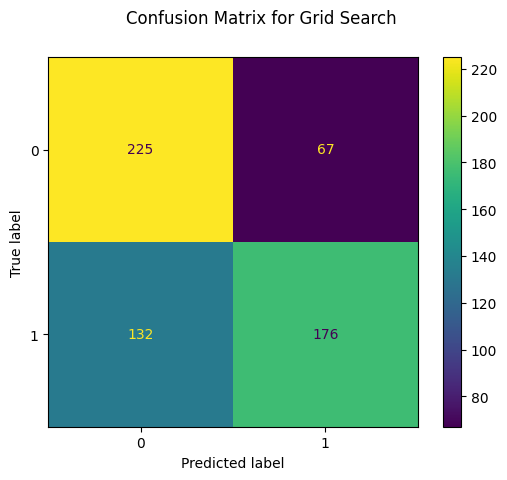

In [105]:
fig = plot_confusion_matrix(grid, testX_scaled, test_y, display_labels=grid.classes_)
fig.figure_.suptitle("Confusion Matrix for Grid Search")
plt.show()

In [446]:
def df_dict_from_pkls():
    
    df_dict = {}
    
    for root, dirs, files in os.walk("./data/pkl", topdown=False):
        for name in files:
            file_path = os.path.join(root, name)
            print(file_path)
            df = pd.read_pickle(file_path)
            df_dict[name[:-4]] = df
    
    return df_dict

df_dict = df_dict_from_pkls()

pd.read_pickle('./data/pkl/B19_1.pkl')

df = pd.concat(df_dict.values(), axis = 0)

df = df._get_numeric_data().reset_index(drop = True)

df_class0 = df[df['Flow Class']==0]
df_class1 = df[df['Flow Class']==1]

maj_class1 = resample(df_class0, 
                                 replace=True,     
                                 n_samples=2000,    
                                 random_state=123) 
maj_class2 = resample(df_class1, 
                                 replace=True,     
                                 n_samples=2000,    
                                 random_state=123) 
df=pd.concat([maj_class1,maj_class2])
df['Flow Class'].value_counts()
x = df.drop('Flow Class', axis=1)
y = df['Flow Class']



./data/pkl/B19_1.pkl
./data/pkl/B20_0.pkl
./data/pkl/B18_1.pkl
./data/pkl/B4_0.pkl
./data/pkl/B10_0.pkl
./data/pkl/B12_0.pkl
./data/pkl/B6_0.pkl
./data/pkl/B2_0.pkl
./data/pkl/B16_0.pkl
./data/pkl/B14_1.pkl
./data/pkl/B13_0.pkl
./data/pkl/B5_0.pkl
./data/pkl/B1_0.pkl
./data/pkl/B15_1.pkl
./data/pkl/B17_0.pkl


In [392]:
y

142029    0
18567     0
39458     0
20572     0
72832     0
         ..
97322     1
96108     1
32160     1
31572     1
93118     1
Name: Flow Class, Length: 3000, dtype: int64

In [447]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [448]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [449]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [450]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [451]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 1.00


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


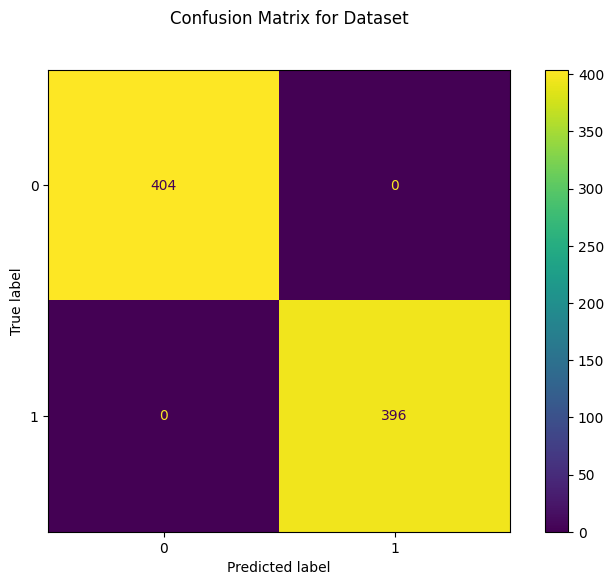

In [452]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Dataset")
plt.show()


In [453]:
from sklearn.metrics import classification_report

print(classification_report(testY, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       396

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



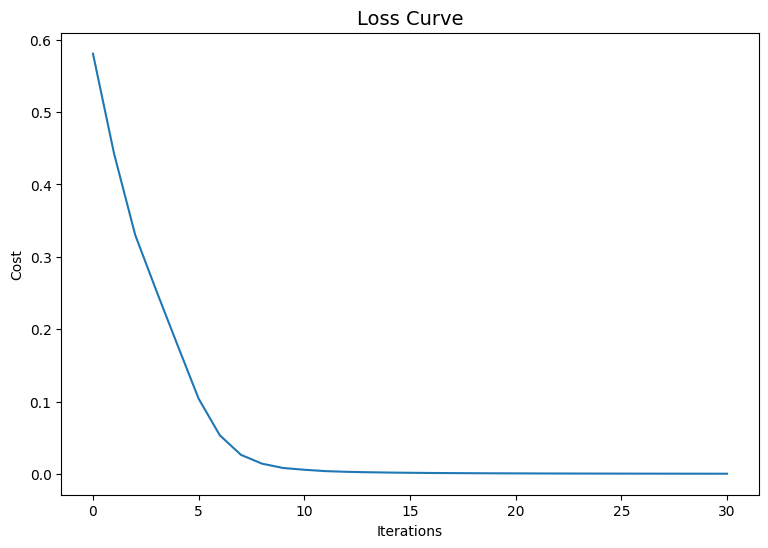

In [454]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [455]:
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp2.head()


,Actual,Predicted
71775,0,0
112536,0,0
98477,1,1
93199,1,1
91392,1,1
